In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12]
m = 2/3
nlist = [round(tnn/(1-m)-1, 6) for tnn in true_nlist]
s = 1.0
L = 2.0
sclist = [0.05, 0.1, 0.5]
num_empty = 100
res_dir = 'nsc-copycubes'
randix = 0
plt.rcParams['figure.constrained_layout.use'] = True
scstyles = ['-', '-.', ':']

n=1.5 	 mean origin time: 1078.53
n=1.5 	 mean origin time: 501.28
n=1.5 	 mean origin time: 66.12
n=3 	 mean origin time: 150.44
n=3 	 mean origin time: 99.92
n=3 	 mean origin time: 27.99
n=6 	 mean origin time: 50.89
n=6 	 mean origin time: 40.26
n=6 	 mean origin time: 19.63
n=12 	 mean origin time: 27.87
n=12 	 mean origin time: 24.21
n=12 	 mean origin time: 16.41


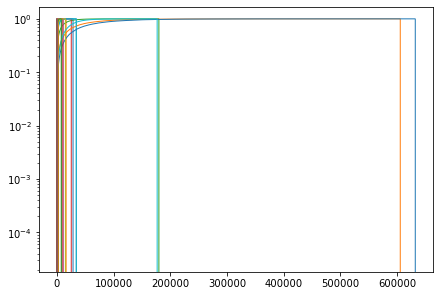

In [3]:
plot_data = {}
plot_angles = {}
plot_seen = {}
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)+1))
for nix, n in enumerate(nlist):
    for scix, sc in enumerate(sclist):
        c = s / sc
        fout = (
            f"{res_dir}/D={D}_n={float(n):.5f}_N={N:.2e}_"
            f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
        )
        true_n = true_nlist[nix]
        res = pd.read_csv(fout+'_civs.csv')
        res_years = pd.read_csv(fout+'_years.csv')
        (counts, bins, patches) = plt.hist(
            res_years.OriginTime, cumulative=True, histtype='step', density=True, log=True, bins=res.shape[0])
        plot_data[(true_n, sc)] = (bins[0:-1], counts)
        (counts, bins, patches) = plt.hist(
            res.AngularBorder, cumulative=True, histtype='step', density=True, log=True, bins=res.shape[0])
        plot_angles[(true_n, sc)] = (bins[0:-1], counts)
        (counts, bins, patches) = plt.hist(
            res.NumberSeen+1, cumulative=True, histtype='step', density=True, log=True, bins=res.shape[0])
        plot_seen[(true_n, sc)] = (bins[0:-1], counts)
        print(f"n={true_nlist[nix]} \t mean origin time: {res_years.OriginTime.mean():.2f}")

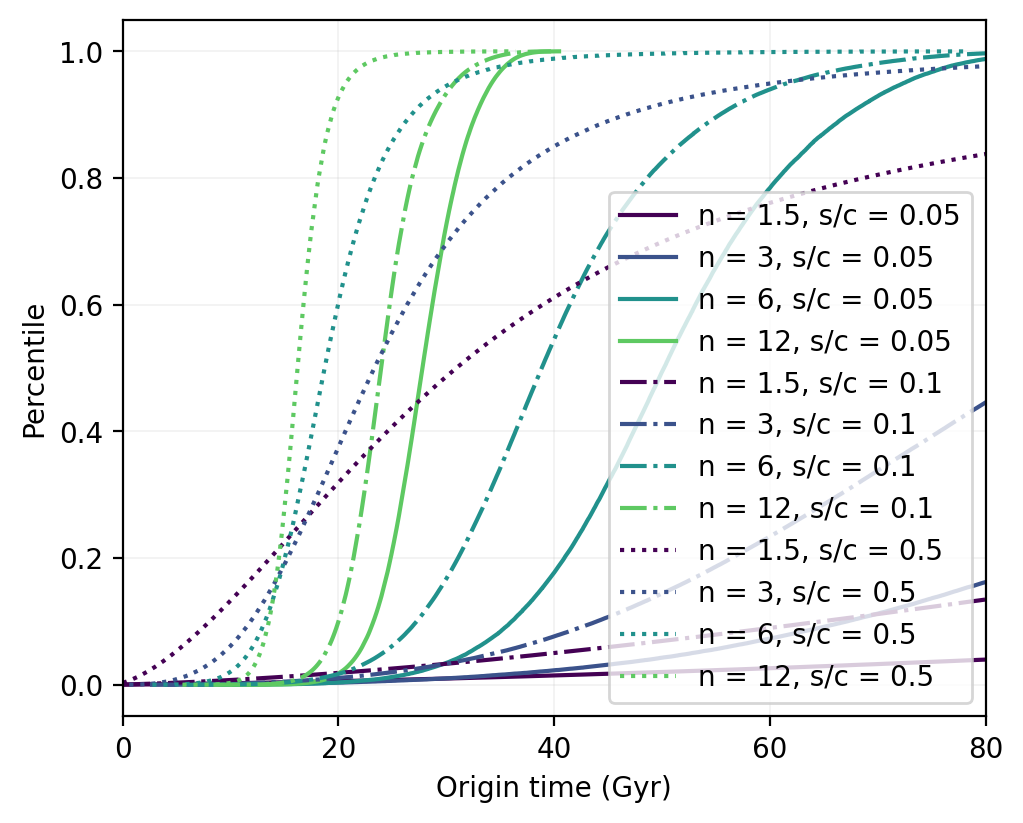

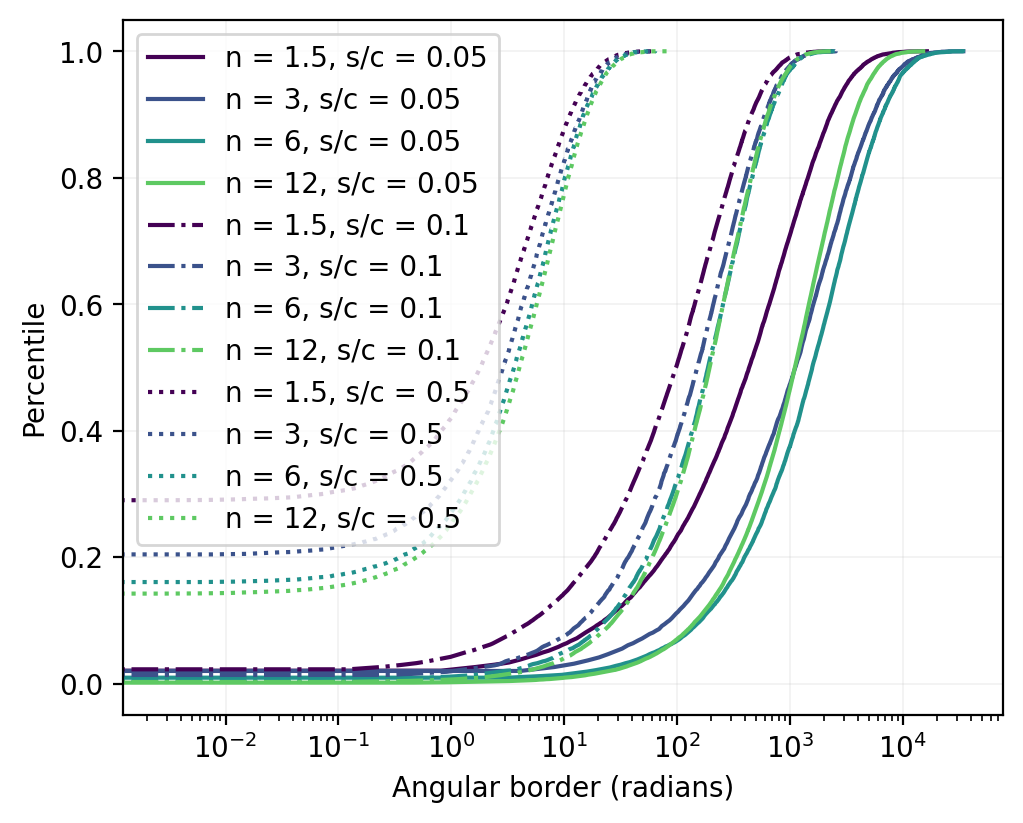

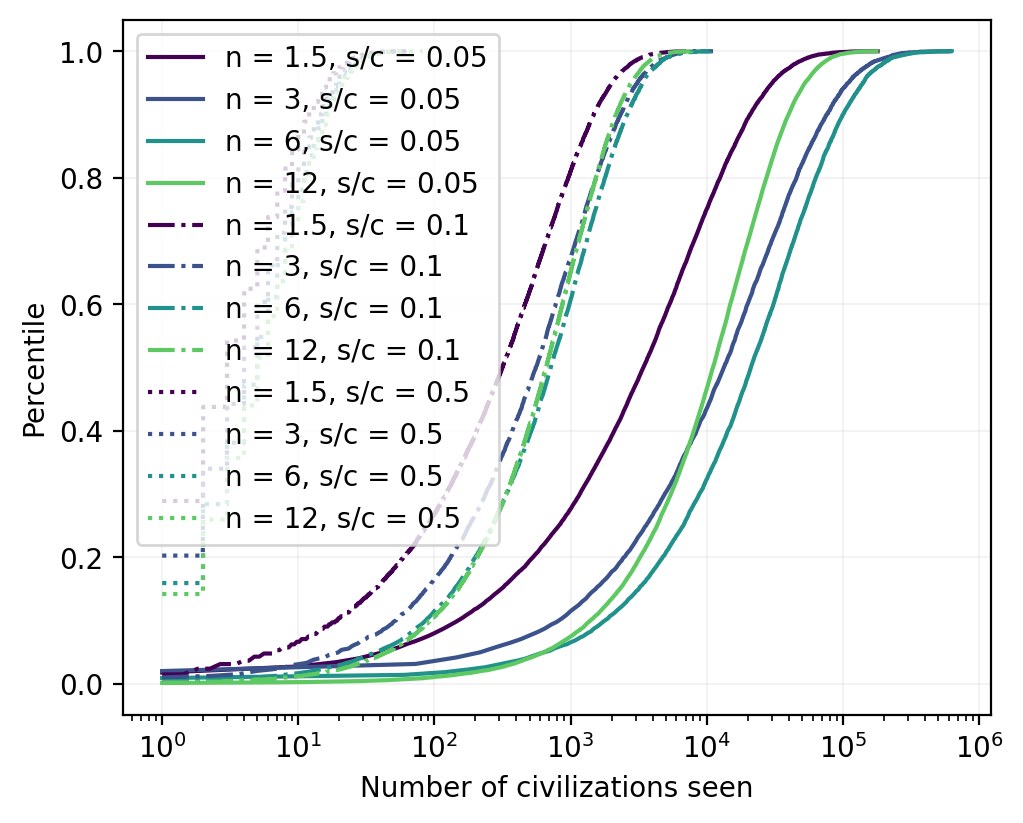

In [4]:
fig = plt.figure(figsize=(5,4), dpi=200)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_data[(true_n, sc)]     
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
plt.gca().set_xlim(1, 50)
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Origin time (Gyr)');
plt.gca().set_xticks([0, 20, 40, 60, 80])
plt.gca().set_xticklabels([0, 20, 40, 60, 80])
plt.legend(leg, loc='lower right');
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotBorder-origin.png', dpi=200);

fig = plt.figure(figsize=(5,4), dpi=200)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_angles[(true_n, sc)]     
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Angular border (radians)');
#plt.gca().set_xticks([0, 10, 20, 30, 40, 50])
#plt.gca().set_xticklabels([0, 10, 20, 30, 40, 50])
plt.gca().set_xscale('log');
plt.legend(leg, loc='upper left');
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotBorder-angles.png', dpi=200);

fig = plt.figure(figsize=(5,4), dpi=200)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_seen[(true_n, sc)]     
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Number of civilizations seen');
plt.gca().set_xticks([1, 2, 10, 100, 1000]);
plt.gca().set_xticklabels([0, '1', 10, 100, 1000]);
plt.gca().set_xscale('log');
plt.legend(leg, loc='upper left');
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotBorder-seen.png', dpi=200);

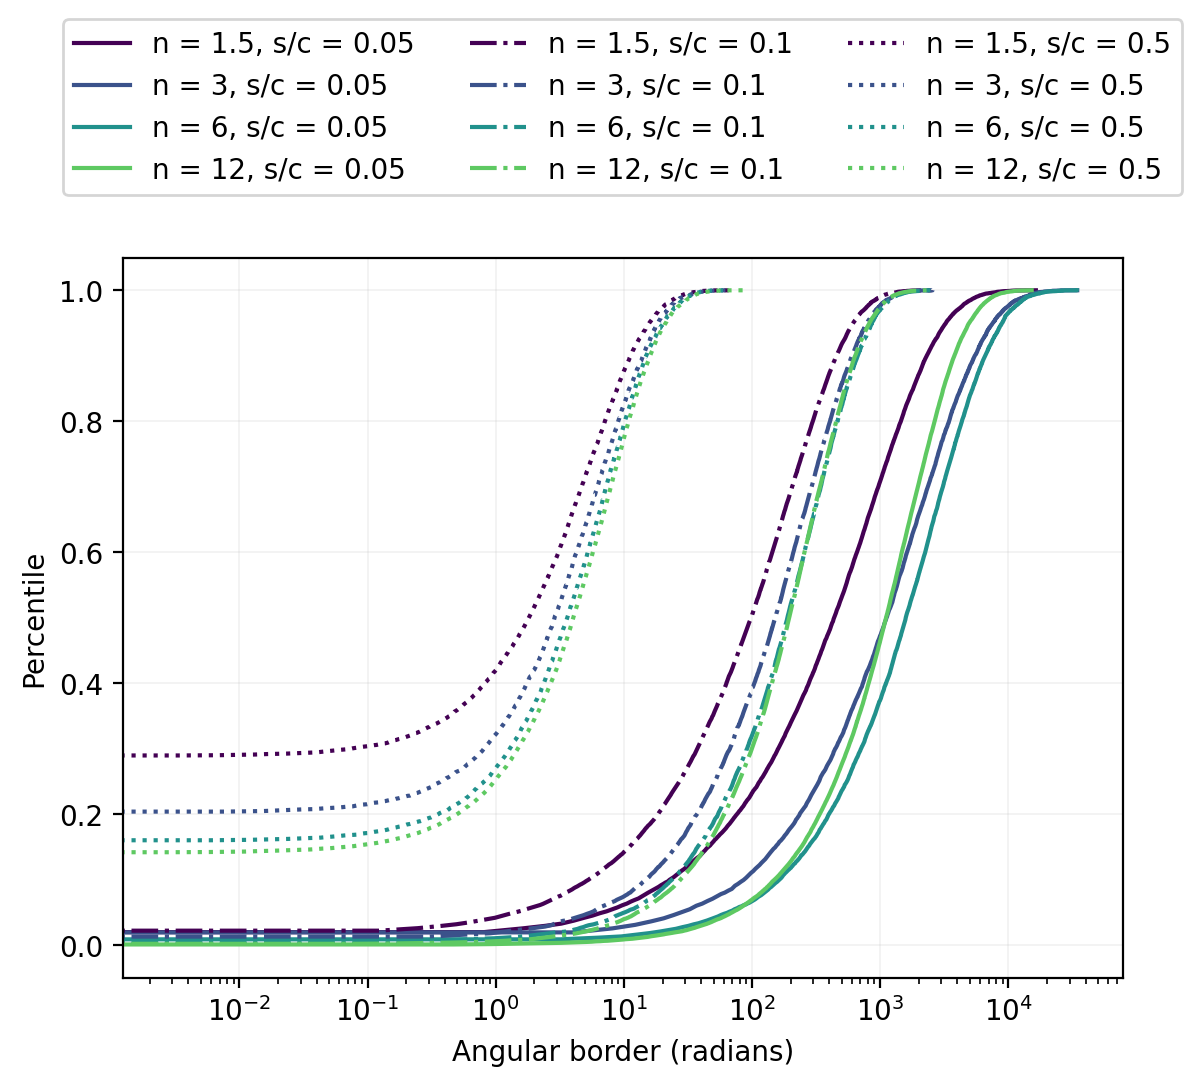

In [7]:
fig = plt.figure(figsize=(5,6),dpi=200)
leg = []
for scix, sc in enumerate(sclist):
    for nix, true_n in enumerate(true_nlist):
        (bins, counts) = plot_angles[(true_n, sc)]     
        plt.plot(bins, counts, scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}")
plt.gca().set_ylabel('Percentile')
plt.gca().set_xlabel('Angular border (radians)');
plt.gca().set_position([0.0,1.0,1.0,0.60])
plt.gca().set_xscale('log');
plt.legend(leg, loc='upper center', bbox_to_anchor = (0.5, 1.35), ncol=3);
plt.grid(linewidth=0.1);
fig.savefig('figures-friday/plotBorder-angles.png', dpi=200, bbox_inches = 'tight');